In [68]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import GridSearchCV, train_test_split
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [69]:
ratings = pd.read_csv("D:\\Users\\Vero\\Desktop\\PHASE_4 Project G7\\ml-latest-small\\ratings.csv")
movies = pd.read_csv("D:\\Users\\Vero\\Desktop\\PHASE_4 Project G7\\ml-latest-small\\movies.csv")
links = pd.read_csv("D:\\Users\\Vero\\Desktop\\PHASE_4 Project G7\\ml-latest-small\\links.csv")
tags = pd.read_csv("D:\\Users\\Vero\\Desktop\\PHASE_4 Project G7\\ml-latest-small\\tags.csv")

In [70]:
df = pd.merge(ratings,movies,on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100836 non-null  object 
 5   genres     100836 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 5.4+ MB


In [72]:
df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [73]:
df.isnull().values.any()

False

In [74]:
df.duplicated().values.any()

False

In [75]:
# Drop unnecessary columns
df = df.drop(columns='timestamp')

In [76]:
#ratings dataframe with average rating and number of ratings
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Name: rating, dtype: float64

In [77]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Name: rating, dtype: int64

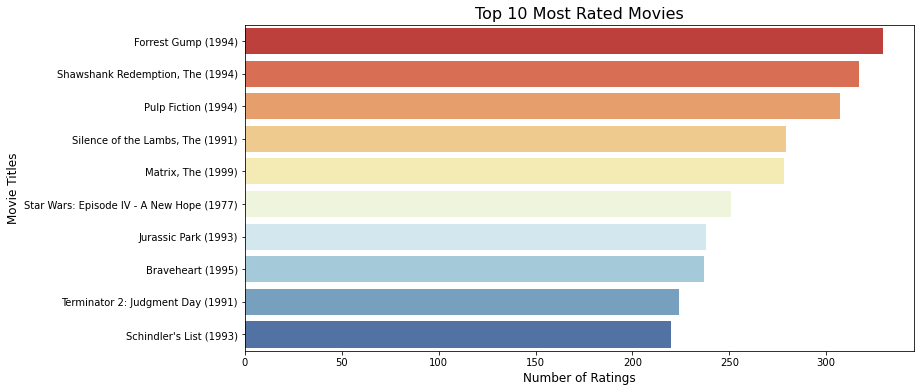

In [78]:
# Count the number of ratings per movie
top_movies = df['title'].value_counts().head(10)

# Plot the top 10 most rated movies
plt.figure(figsize=(12, 6))
sns.barplot(x=top_movies.values, y=top_movies.index, palette='RdYlBu')
plt.title('Top 10 Most Rated Movies', fontsize=16)
plt.xlabel('Number of Ratings', fontsize=12)
plt.ylabel('Movie Titles', fontsize=12)
plt.show()

In [79]:
movie_ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
movie_ratings['no of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
movie_ratings.head()

,rating,no of ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


<AxesSubplot:>

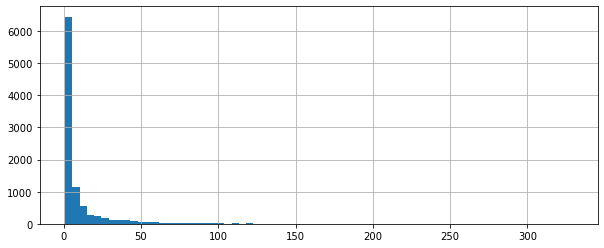

In [80]:
plt.figure(figsize=(10,4))
movie_ratings['no of ratings'].hist(bins=70)

<AxesSubplot:>

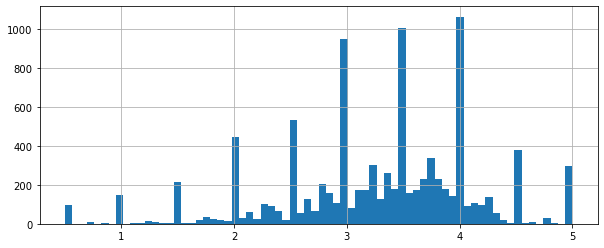

In [81]:
plt.figure(figsize=(10,4))
movie_ratings['rating'].hist(bins=70)

In [82]:
moviemat = df.pivot_table(index='userId',columns='title',values='rating')
moviemat.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
pip install surprise

Note: you may need to restart the kernel to use updated packages.


In [84]:
from surprise import Reader, Dataset
reader = Reader()

# Ensure the DataFrame has only the necessary columns
df_for_surprise = df[['userId', 'movieId', 'rating']]

# Load the data into Surprise's Dataset object
data = Dataset.load_from_df(df_for_surprise, reader)

In [85]:
dataset = data.build_full_trainset()
print('Number of users: ', dataset.n_users, '\n')
print('Number of items: ', dataset.n_items)

Number of users:  610 

Number of items:  9724


In [86]:
# importing relevant libraries
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import SVD
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline
from surprise.model_selection import GridSearchCV
import numpy as np

In [87]:
params = {'n_factors': [20, 50, 100],
         'reg_all': [0.02, 0.05, 0.1]}       
g_s_svd = GridSearchCV(SVD,param_grid=params,n_jobs=-1)
g_s_svd.fit(data)

In [88]:
print(g_s_svd.best_score)
print(g_s_svd.best_params)

{'rmse': 0.8687139882822337, 'mae': 0.6679609592575485}
{'rmse': {'n_factors': 50, 'reg_all': 0.05}, 'mae': {'n_factors': 50, 'reg_all': 0.05}}


In [89]:
# Build the full trainset with the best parameters
best_params = g_s_svd.best_params
trainset = data.build_full_trainset()

In [91]:
print("Best parameters:", g_s_svd.best_params)

Best parameters: {'rmse': {'n_factors': 50, 'reg_all': 0.05}, 'mae': {'n_factors': 50, 'reg_all': 0.05}}


In [100]:
# Get the best parameters for RMSE
best_params = g_s_svd.best_params
print("Best parameters:", best_params)

# Access the best parameters for RMSE
best_rmse_params = best_params['rmse']
print("Best parameters for RMSE:", best_rmse_params)

# Check the structure of best_rmse_params
print("Best RMSE Params Structure:", best_rmse_params)

# Initialize and fit the SVD model with the best parameters
try:
    algo = SVD(
        n_factors=best_rmse_params['n_factors'],  
        n_epochs=10,  
        lr_all=0.01,  
        reg_all=best_rmse_params['reg_all']
    )
except KeyError as e:
    print(f"Parameter not found: {e}")

# Fit the model on the full trainset
trainset = data.build_full_trainset()
algo.fit(trainset)

# Predict ratings for all pairs (u, i) that are NOT in the training set.
testset = trainset.build_anti_testset()

# Predicting the ratings for the test set
predictions = algo.test(testset)

# Optional: Print some predictions
for uid, iid, true_r, est, _ in predictions[:10]:  # Display the first 10 predictions
    print(f'User: {uid}, Item: {iid}, True Rating: {true_r}, Estimated Rating: {est}')


Best parameters: {'rmse': {'n_factors': 50, 'reg_all': 0.05}, 'mae': {'n_factors': 50, 'reg_all': 0.05}}
Best parameters for RMSE: {'n_factors': 50, 'reg_all': 0.05}
Best RMSE Params Structure: {'n_factors': 50, 'reg_all': 0.05}
User: 1, Item: 318, True Rating: 3.501556983616962, Estimated Rating: 5
User: 1, Item: 1704, True Rating: 3.501556983616962, Estimated Rating: 4.877729824276223
User: 1, Item: 6874, True Rating: 3.501556983616962, Estimated Rating: 4.837384141636029
User: 1, Item: 8798, True Rating: 3.501556983616962, Estimated Rating: 4.543582925618142
User: 1, Item: 46970, True Rating: 3.501556983616962, Estimated Rating: 4.229573299203505
User: 1, Item: 48516, True Rating: 3.501556983616962, Estimated Rating: 5
User: 1, Item: 58559, True Rating: 3.501556983616962, Estimated Rating: 4.891661168476842
User: 1, Item: 60756, True Rating: 3.501556983616962, Estimated Rating: 4.444796503146741
User: 1, Item: 68157, True Rating: 3.501556983616962, Estimated Rating: 4.84260843047912

In [101]:
def get_all_predictions(predictions):
    
    # First map the predictions to each user.
    top_n = defaultdict(list)    
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)

    return top_n

In [104]:
from collections import defaultdict

def get_all_predictions(predictions):
    # First map the predictions to each user.
    top_n = defaultdict(list)    
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)

    return top_n

# Assuming predictions is already generated from algo.test(testset)
predictions = algo.test(testset)  # Ensure this is executed first
all_pred = get_all_predictions(predictions)  # Get all predictions

# To get top N recommendations
n = 4

# Limit each user's recommendations to the top N
for uid in all_pred.keys():
    all_pred[uid] = all_pred[uid][:n]  # Keep only the top N recommendations

# Optional: Print top recommendations for each user
for uid, user_ratings in all_pred.items():
    print(f'User {uid}: {user_ratings}')

User 1: [(318, 5), (48516, 5), (898, 5), (904, 5)]
User 5: [(1208, 4.340021827125649), (904, 4.309314641586166), (750, 4.2839042886120815), (1248, 4.2783029560692585)]
User 7: [(2959, 4.038496199739747), (318, 4.011732408410892), (3451, 4.003739344084595), (56782, 3.9998274956608593)]
User 15: [(1104, 4.112624407737217), (750, 4.111871819267839), (1204, 4.106376919094026), (50, 4.0995814401621455)]
User 17: [(1104, 4.618035228600293), (898, 4.532161628600863), (1204, 4.524312198348244), (3451, 4.523845696649394)]
User 18: [(1204, 4.460703470188747), (1104, 4.451086068282128), (750, 4.446429558429274), (1248, 4.408364885199967)]
User 19: [(1204, 3.5266344203217064), (750, 3.5110126262553156), (318, 3.483805085347818), (741, 3.4716873458010515)]
User 21: [(3836, 3.953934707892386), (318, 3.885088185238354), (1884, 3.858229332402559), (1242, 3.8541451972109417)]
User 27: [(1104, 4.271570854459435), (1252, 4.261694514298527), (922, 4.249176138789227), (318, 4.247560237854929)]
User 31: [(1

In [105]:
tmp = pd.DataFrame.from_dict(all_pred)
tmp_transpose = tmp.transpose()

In [106]:
def get_predictions(user_id):
    results = tmp_transpose.loc[user_id]
    return results

In [107]:
user_id=29
results = get_predictions(user_id)
results

0    (1104, 4.6306821430188645)
1     (1276, 4.616150933113469)
2      (898, 4.591105287757734)
3      (951, 4.579370669427294)
Name: 29, dtype: object

In [108]:
recommended_movie_ids=[]
for x in range(0, n):
    recommended_movie_ids.append(results[x][0])

recommended_movie_ids

[1104, 1276, 898, 951]

In [110]:
movies = pd.read_csv("D:\\Users\\Vero\\Desktop\\PHASE_4 Project G7\\ml-latest-small\\movies.csv")
movies.head()
recommended_movies = movies[movies['movieId'].isin(recommended_movie_ids)]
recommended_movies

,movieId,title,genres
680,898,"Philadelphia Story, The (1940)",Comedy|Drama|Romance
731,951,His Girl Friday (1940),Comedy|Romance
841,1104,"Streetcar Named Desire, A (1951)",Drama
975,1276,Cool Hand Luke (1967),Drama
